Problem Statement: To build a Classification Model to Predict Loan Approvals based on Applicants financial history, income, credit score, and other attributes.

Preprocessing Steps:

In [1]:
import pandas as pd

df = pd.read_csv("loan_prediction.csv")

print("shape:", df.shape)
print("columns:", df.columns.tolist())
print("head:\n", df.head())

shape: (614, 13)
columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
head:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0

In [ ]:
#Checking the missing values
print(df.info())

#Checking the data types and missing values
print("\nMissing values in each columns:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB
None

Missing values in each columns:
 Loan_ID               0
Gender               13
Married               3
Depend

In [3]:
# Fillin the categorical/discrete with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Filling  the continuous numerical with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Checking/Confirming the missing values again
print("\nMissing values after filling:\n", df.isnull().sum())


Missing values after filling:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_31920\2942779692.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_31920\2942779692.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

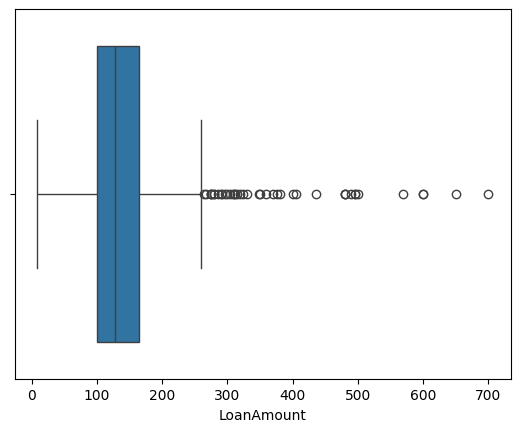

In [5]:
#Outlier Detection (IQR Method) for LoanAmount
import seaborn as sns
sns.boxplot(x=df['LoanAmount'])

#IQR Calculations
Q1=df['LoanAmount'].quantile(0.25)
Q3=df['LoanAmount'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#Outlier Removal step
df=df[(df['LoanAmount']>=lower_bound)&(df['LoanAmount']<=upper_bound)]

In [6]:
#Using One-Hot Encoding for nominal categories:

#Load_iD is irrelevent, so we dropped it
df.drop('Loan_ID', axis=1, inplace=True)

# One-Hot Encoding for all object-type categorical columns
df = pd.get_dummies(df, drop_first=True)

print("Shape after encoding:", df.shape)
df.head()

Shape after encoding: (573, 15)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True


Model Training & Evaluation(using Random Forest)

In [11]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

x=df.drop('Loan_Status_Y', axis=1)
y=df['Loan_Status_Y']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [21]:
#Training the model using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

#predictions
y_pred=rf_model.predict(x_test)

In [22]:
#Evaluation of Random Forest model
print("Random Forest Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred)*100, "%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Evaluation Results:
Accuracy: 83.47826086956522 %
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.54      0.67        35
        True       0.83      0.96      0.89        80

    accuracy                           0.83       115
   macro avg       0.85      0.75      0.78       115
weighted avg       0.84      0.83      0.82       115

Confusion Matrix:
 [[19 16]
 [ 3 77]]


In [24]:
#Training the model using SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svc_model = SVC(probability=True, random_state=42)
svc_model.fit(x_train, y_train)

#predictions
y_pred_svc = svc_model.predict(x_test)

In [25]:
print("SVC Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc) * 100, "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

SVC Evaluation Results:
Accuracy: 83.47826086956522 %

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.49      0.64        35
        True       0.81      0.99      0.89        80

    accuracy                           0.83       115
   macro avg       0.88      0.74      0.77       115
weighted avg       0.85      0.83      0.82       115


Confusion Matrix:
 [[17 18]
 [ 1 79]]
